연봉 계산 실습

In [4]:
!pip install sklearn
import pandas as pd
salary=pd.read_csv("stats.csv", encoding="cp949")
salary
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
Y=salary['연봉(2022)']
X=salary.drop(['선수','연봉(2022)'], axis=1, inplace=False)
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.6,
random_state=19)

In [6]:
!pip install statsmodels

     ---------------------------------------- 9.4/9.4 MB 19.3 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 7.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
lr=LinearRegression()
lr.fit(X_train, Y_train)
print(lr.coef_)
import statsmodels.api as sm
from statsmodels.formula.api import ols, glm
model=sm.OLS(Y_train, X_train).fit()

[-7.69230769e-01  4.24728646e+04]


In [8]:
model.summary()

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               연봉(2022)   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.668
Method:                 Least Squares   F-statistic:                              4.024
Date:                Mon, 15 May 2023   Prob (F-statistic):                       0.332
Time:                        22:53:51   Log-Likelihood:                         -37.029
No. Observations:                   3   AIC:                                      78.06
Df Residuals:                       1   BIC:                                      76.26
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
연봉(2021)       4.0456      2.038      1.985      0.297     -21.855      29.946
WAR         -2.61e+05   2.59e+05     -1.007      0.498   -3.56e+06    3.03e+06
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.068
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.425
Skew:                           0.535   Prob(JB):                        0.809
Kurtosis:                       1.500   Cond. No.                     3.18e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
Y_predict=lr.predict(X_test)
from math import sqrt
from sklearn.metrics import mean_squared_error
print(sqrt(mean_squared_error(Y_test, Y_predict)))
Y_predict
salary['예측2022']=pd.Series(Y_predict)
salary.head()

135155.93909846683


,선수,연봉(2022),연봉(2021),WAR,예측2022
0,추신수,270000,270000,-0.150,170915.526192
1,구자욱,250000,28000,-0.132,169221.330816
2,한유섬,240000,50000,0.736,179093.912223
3,나성범,200000,50000,0.459,-16002.831524
4,박건우,190000,45000,0.136,190858.895706


<AxesSubplot: xlabel='선수'>

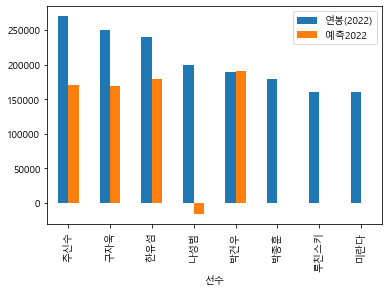

In [11]:
import matplotlib as plt
plt.rc('font', family='Malgun Gothic')
salary.plot(x='선수', y=['연봉(2022)','예측2022' ], kind="bar")

시세 예측

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('price.csv', encoding="cp949", names=['day', 'price'])
df

,day,price
0,2020-08-27 0:00,4354.308333
1,2020-08-28 0:00,4391.673517
2,2020-08-29 0:00,4607.985450
3,2020-08-30 0:00,4594.987850
4,2020-08-31 0:00,4748.255000
...,...,...
360,2021-08-22 0:00,6575.229167
361,2021-08-23 0:00,6434.881667
362,2021-08-24 0:00,6543.645714
363,2021-08-25 0:00,6719.429231


<AxesSubplot: xlabel='day'>

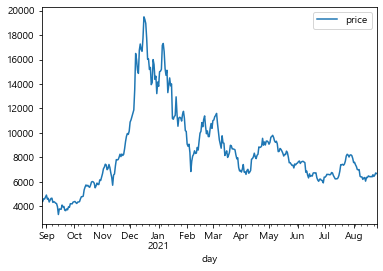

In [13]:
df['day']=pd.to_datetime(df['day'])
df.index=df['day']
df.set_index('day', inplace=True)
df.head()
df.plot()

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

model = SARIMAX(df.price.values, order=(2, 1, 2), trend='c')
model_fit = model.fit()
print(model_fit.summary())


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2787.483
Date:                Mon, 15 May 2023   AIC                           5586.967
Time:                        22:55:51   BIC                           5610.350
Sample:                             0   HQIC                          5596.261
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8121      6.735      0.121      0.904     -12.388      14.012
ar.L1          0.2416      0.339      0.713      0.476      -0.423       0.906
ar.L2          0.6069      0.211      2.874      0.0

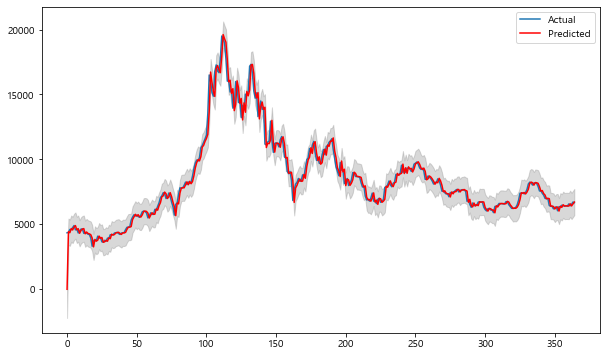

In [21]:
# Convert confidence intervals to DataFrame
confidence_intervals = pd.DataFrame(confidence_intervals, columns=['lower', 'upper'])

# Plotting actual and predicted values
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df.price.values, label='Actual')
ax.plot(pred_values, color='red', label='Predicted')
ax.fill_between(confidence_intervals.index, confidence_intervals['lower'], confidence_intervals['upper'], color='gray', alpha=0.3)
ax.legend()
plt.show()


영화 평점 예측 실습

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dff = pd.read_csv('movie.csv', encoding="cp949")
from statsmodels.formula.api import ols
res=ols('grade1 ~ grade2', data=dff).fit()
res.summary()

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 grade1   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     9.653
Date:                Mon, 15 May 2023   Prob (F-statistic):             0.0172
Time:                        22:58:39   Log-Likelihood:                -5.1324
No. Observations:                   9   AIC:                             14.26
Df Residuals:                       7   BIC:                             14.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6157      1.020      4.526      0.003       2.204       7.027
grade2         0.4960      0.160      3.107      0.017       0.119       0.874
==============================================================================
Omnibus:                        0.960   Durbin-Watson:                   2.206
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                0.597
Skew:                           0.557   Prob(JB):                        0.742
Kurtosis:                       2.407   Cond. No.                         41.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
y=dff['grade1']
x=dff[['grade2']]
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x, y)
result=model.predict(x)
print(result)
dff['예측평가']=pd.Series(result)

[7.3437804  7.42810172 8.5837998  7.59178428 8.08779204 7.09577651
 8.30107538 8.08779204 7.18009783]


In [28]:
dff.rename(columns={'grade1':'평점(네티즌)','grade2':'평점(기자-평론가)'})

,영화제목,평점(네티즌),평점(기자-평론가),예측평가
0,불도저에 탄 소녀,8.21,5.50,7.343780
1,약속의 네버랜드,7.10,5.67,7.428102
2,나의 집은 어디인가,8.69,8.00,8.583800
3,앰블런스,7.18,6.00,7.591784
4,수퍼 소닉2,8.38,7.00,8.087792
5,스텔라,6.75,5.00,7.095777
6,패러렐마더스,7.75,7.43,8.301075
7,재춘언니,8.40,7.00,8.087792
8,모비우스,7.24,5.17,7.180098
